# Getting Started with Images

## Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Display Image Directly

In [2]:
Image(filename='images/checkerboard_18x18.png')

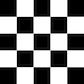

In [3]:
Image(filename='images/checkerboard_84x84.png')

## Reading images using OpenCV

using **`cv2.imread()`**

**Function Syntax**
```
cv2.imread( filename[, flags] )
```

**Flags**
1. `cv2.IMREAD_GRAYSCALE` or `0`: Loads image in grayscale mode
2. `cv2.IMREAD_COLOR` or `1`: Loads a color image. It is the default flag. Any transparency of image will be neglected.
3. `cv2.IMREAD_UNCHANGED` OR `-1`: Loads image as such including alpha channel. 

In [4]:
# Read image as gray scale.
# cb_image = cv2.imread('images/checkerboard_18x18.png', cv2.IMREAD_GRAYSCALE)
cb_image = cv2.imread('images/checkerboard_18x18.png', 0)

cb_image

array([[  0,  26,   0, 153, 255, 252, 255, 108,   0,   0, 108, 255, 252,
        255, 153,   0,  27,   0],
       [ 27,  40,   0, 154, 255, 249, 255, 111,   0,   0, 111, 255, 249,
        255, 154,   0,  40,  27],
       [  0,   0,   0, 150, 255, 255, 255,  96,   0,   0,  96, 255, 255,
        255, 150,   0,   0,   0],
       [153, 154, 150, 169, 194, 191, 193, 162, 151, 151, 162, 193, 191,
        194, 169, 150, 154, 153],
       [255, 255, 255, 194,   0,   0,   0, 229, 255, 255, 229,   0,   0,
          0, 194, 255, 255, 255],
       [252, 249, 255, 191,   0,  45,   0, 221, 255, 255, 221,   0,  46,
          0, 191, 255, 249, 252],
       [255, 255, 255, 193,   0,   0,   0, 225, 255, 255, 225,   0,   0,
          0, 193, 255, 255, 255],
       [108, 111,  96, 162, 229, 221, 225, 139, 102, 102, 139, 225, 221,
        229, 162,  96, 111, 108],
       [  0,   0,   0, 151, 255, 255, 255, 102,   0,   0, 102, 255, 255,
        255, 151,   0,   0,   0],
       [  0,   0,   0, 151, 255, 255,

## Display Image attributes

In [5]:
# size of image
print(f'Image size: {cb_image.shape}')

# data-type of image
print(f'Data type of image: {cb_image.dtype}')

Image size: (18, 18)
Data type of image: uint8


## Display Images using Matplotlib

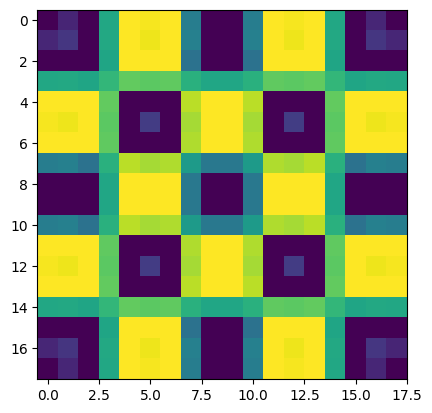

In [6]:
plt.imshow(cb_image)

**Matplotlib uses different color maps and it's possible that the gray scale color map is not set.**

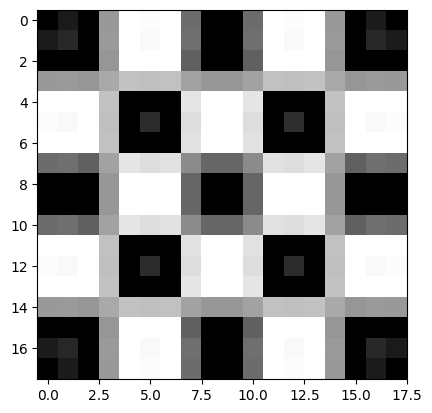

In [7]:
# Setting color map to gray scale
plt.imshow(cb_image, cmap='gray')
# plt.imshow(cv2.cvtColor(cb_image, cv2.COLOR_BGR2RGB))

## Working with Color Images

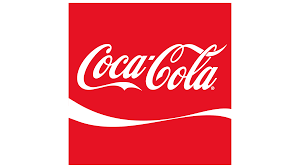

In [8]:
# actual image
Image(filename='images/coca_cola_logo.png')

In [9]:
coke_logo_img = cv2.imread('images/coca_cola_logo.png', 1)

print(f'Image size: {coke_logo_img.shape}')
print(f'Data type of image: {coke_logo_img.dtype}')

Image size: (168, 300, 3)
Data type of image: uint8


## Display the Image

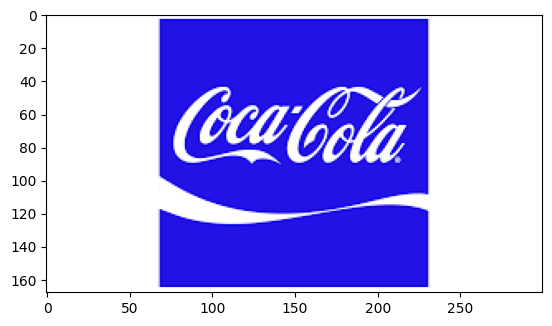

In [10]:
plt.imshow(coke_logo_img)

**The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. We need to reverse the channels of the image for correct display.**

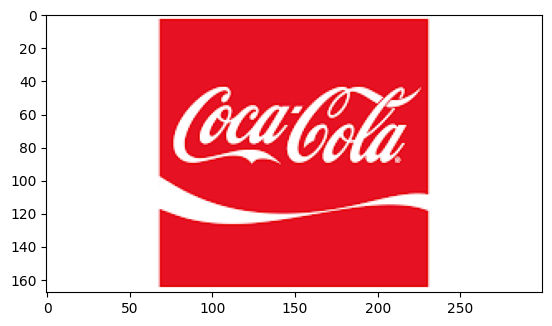

In [11]:
coke_logo_img_channels_reversed = coke_logo_img[:, :, ::-1]
plt.imshow(coke_logo_img_channels_reversed)

## Splitting and Merging Color Channels

* **`cv2.split()`** Divides a multi-channel array into several single-channel arrays.

* **`cv2.merge()`** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

Text(0.5, 1.0, 'Merged Image')

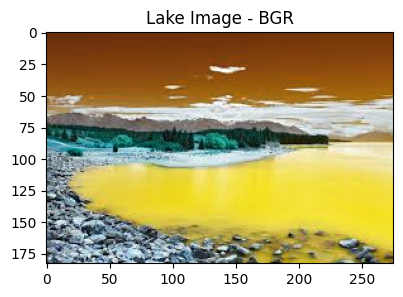

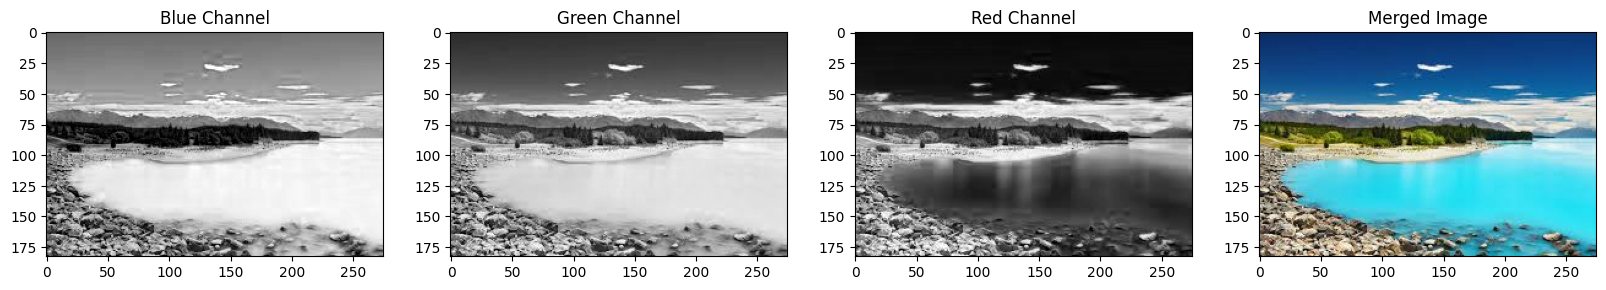

In [12]:
# Read the image in BGR format
img_lake_bgr = cv2.imread('images/lake.jpeg', cv2.IMREAD_COLOR)
plt.figure(figsize=[10, 3])
plt.imshow(img_lake_bgr)
plt.title('Lake Image - BGR')

# split the image into the B, G, R components
b, g, r = cv2.split(img_lake_bgr)

# show channels
plt.figure(figsize=[20, 5])

plt.subplot(141)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel')

plt.subplot(142)
plt.imshow(g, cmap='gray')
plt.title('Green Channel')

plt.subplot(143)
plt.imshow(r, cmap='gray')
plt.title('Red Channel')

# merge the channels
img_lake_merged = cv2.merge((b, g, r))
# show the merged image
plt.subplot(144)
plt.imshow(img_lake_merged[:, :, ::-1])
plt.title('Merged Image')

## Converting to different color spaces

**`cv2.cvtColor()`** Converts an image from one color space to another.

**Function Syntax**
```
cv2.cvtColor(src, code)
```

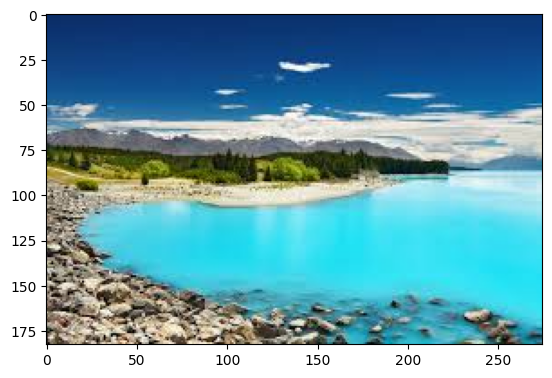

In [13]:
img_lake_rgb = cv2.cvtColor(img_lake_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_lake_rgb)

## Changing to HSV color space

Text(0.5, 1.0, 'Original Image')

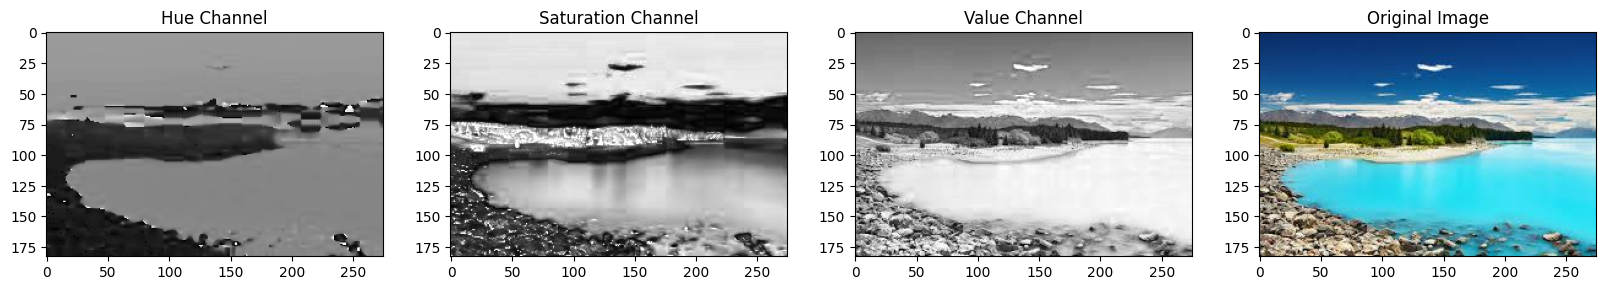

In [14]:
img_hsv = cv2.cvtColor(img_lake_bgr, cv2.COLOR_BGR2HSV)

# split the image into the H, S, V components
h, s, v = cv2.split(img_hsv)

# show channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(h, cmap='gray');plt.title('Hue Channel')

plt.subplot(142);plt.imshow(s, cmap='gray');plt.title('Saturation Channel')

plt.subplot(143);plt.imshow(v, cmap='gray');plt.title('Value Channel')

plt.subplot(144);plt.imshow(img_lake_rgb);plt.title('Original Image')

## Modify individual channels

Text(0.5, 1.0, 'Modified Image')

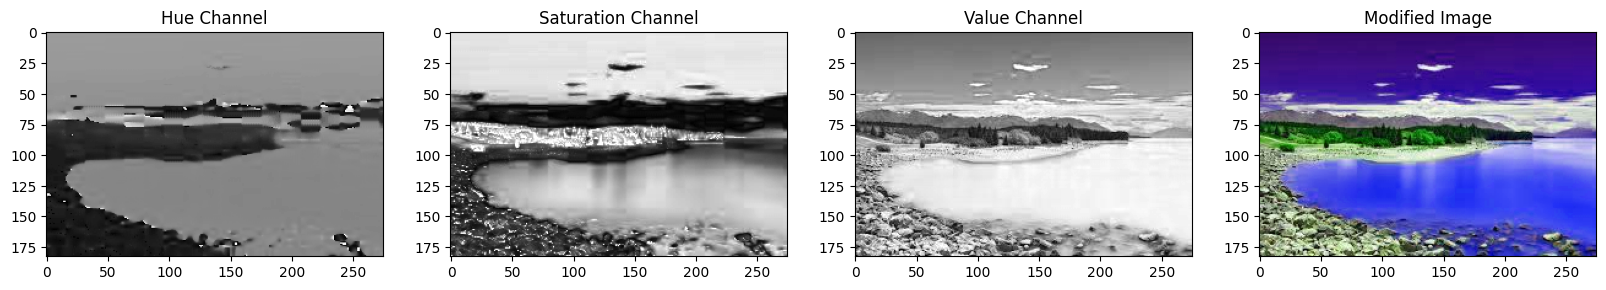

In [15]:
h_new = h + 25
img_lake_merged_hsv = cv2.merge((h_new, s, v))
img_lake_rgb_hsv = cv2.cvtColor(img_lake_merged_hsv, cv2.COLOR_HSV2RGB)

# show channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(h_new, cmap='gray');plt.title('Hue Channel')
plt.subplot(142);plt.imshow(s, cmap='gray');plt.title('Saturation Channel')
plt.subplot(143);plt.imshow(v, cmap='gray');plt.title('Value Channel')
plt.subplot(144);plt.imshow(img_lake_rgb_hsv);plt.title('Modified Image')

## Saving Images

**`cv2.imwrite()`** Saves an image to a specified file.

**Function Syntax**
```
cv2.imwrite( filename, image )
```

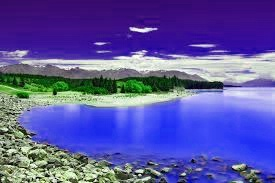

In [16]:
# save the modified image
cv2.imwrite('images/lake_hue_modified.jpg', img_lake_rgb_hsv[:, :, ::-1])

# Read the image in BGR format
Image(filename='images/lake_hue_modified.jpg')

In [17]:
# Read the image in BGR format
img_modified = cv2.imread('images/lake_hue_modified.jpg', cv2.IMREAD_COLOR)
print(f'Modifed Image shape(H, W, C): {img_modified.shape}')

# read the image in grayscale
img_modified_gray = cv2.imread('images/lake_hue_modified.jpg', cv2.IMREAD_GRAYSCALE)
print(f'Modified Image gray shape(H, W): {img_modified_gray.shape}')

Modifed Image shape(H, W, C): (183, 275, 3)
Modified Image gray shape(H, W): (183, 275)
